In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer



In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Univariate Analysis

In [8]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

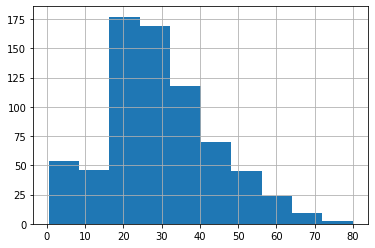

In [9]:
df['Age'].hist()


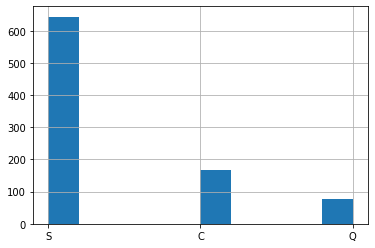

In [10]:
df['Embarked'].hist()

# Bivariate Analysis

## Continuous-Continuous variables

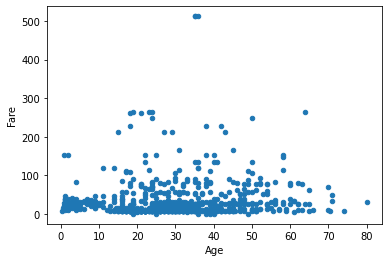

In [11]:
df.plot.scatter('Age','Fare')

In [12]:
df[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


## Categorical-continuous variables

In [13]:
df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [14]:
males = df[df['Sex'] == 'male']
females = df[df['Sex'] == 'female']
ttest_ind(males['Age'],females['Age'],nan_policy='omit')

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

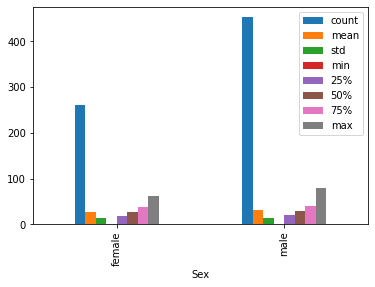

In [15]:
df.groupby('Sex')['Age'].describe().plot.bar()

## Categorical-Categorical variable analysis

In [16]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [17]:
chi2_contingency(pd.crosstab(df['Sex'],df['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

# Treating missing values

In [18]:
df.isnull().sum() ##shows missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# droping all the rows where there are missing values
newdf=df.dropna()
newdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
# droping those rows where all the entries are missing
df.dropna(how = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
# Droping columns where there is any missing value
df.dropna(axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


## filling the missing values

In [22]:
# filling 0 
df['Age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [45]:
df['Age'].fillna(df['Age'].mean())

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    29.20404
889    26.00000
890    32.00000
Name: Age, Length: 888, dtype: float64

# Outlier Treatment


## Univariate outlier Detectin

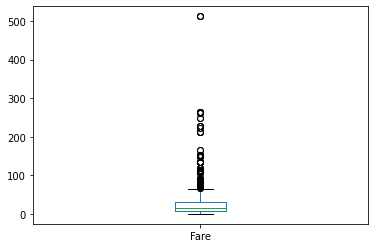

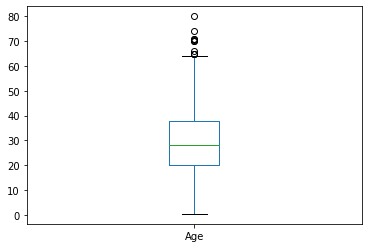

In [24]:
df['Fare'].plot.box()
plt.show()
df['Age'].plot.box()
plt.show()

## Bivariate outlier detection

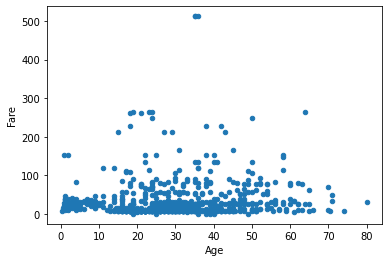

In [25]:
df.plot.scatter('Age','Fare')

## Removing outliers in Fare (>300)

In [26]:
df = df[df['Fare']<300]

## Replacing outlier ages with mean value of ages

In [27]:
df.loc[df['Age']>65,'Age'] = np.mean(df['Age']) ##in loc first is row and second is col

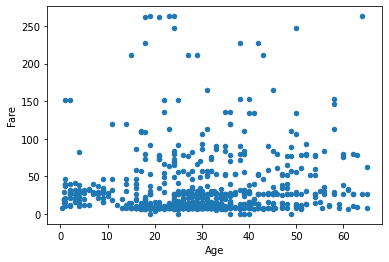

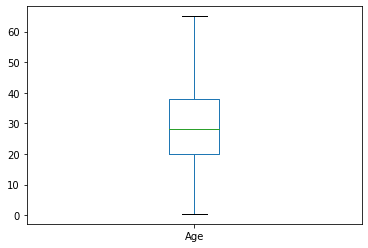

In [28]:
df.plot.scatter('Age','Fare')
plt.show()
df['Age'].plot.box()
plt.show()

# Variable Transformation

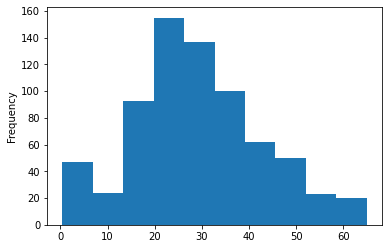

In [29]:
df['Age'].plot.hist()

## Binning

In [30]:
bins = [0,18,50,65]
groups = ['Child','Adult','Senior citizen']
df['age_group'] = pd.cut(df['Age'],bins,labels = groups)

In [31]:
df['age_group'].value_counts()

Adult             516
Child             139
Senior citizen     56
Name: age_group, dtype: int64

# Predictive Modeling

In [35]:
data = df.drop('Name',axis =1)
data = pd.get_dummies(data)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [86]:
x = data.drop(['Survived'],axis=1)
y = data['Survived']
x.fillna(0,inplace=True)


In [87]:
train_x,test_x,train_y,test_y = train_test_split(x,y,stratify=y)

In [88]:
train_y.value_counts()/len(train_y)


0    0.618619
1    0.381381
Name: Survived, dtype: float64

In [89]:
test_y.value_counts()/len(test_y)

0    0.617117
1    0.382883
Name: Survived, dtype: float64

In [94]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)

LogisticRegression()

In [95]:
logregscore = logreg.score(test_x, test_y)

In [96]:
dtree = DecisionTreeClassifier()
dtree.fit(train_x, train_y)

DecisionTreeClassifier()

In [99]:
dtreescore = dtree.score(test_x, test_y)